In [1]:
# Computing
import numpy as np
import pandas as pd

# Visualization
import plotly.express as px

# Outlier Detection
from sklearn.neighbors import LocalOutlierFactor

# Modelling
from sklearn.cluster import KMeans

# Evaluation
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

# Deployment
import dash
import dash_bootstrap_components as dbc
from dash import Input, Output, dcc, html, dash_table
import base64

import statistics

In [2]:
# Import Data
# Data awal disimpan kedalam frame data
data = pd.read_csv('dataset/datasetFull.csv')
data

,Timestamp,EmailAddress,NamaLengkap,NIM,Angkatan,GolonganUKT,NoHP,IPGanjil,OrganisasiGanjil,KerjaGanjil,IPGenap,OrganisasiGenap,KerjaGenap
0,23/09/2022 18:21,leniandriani836@gmail.com,Leni Andriani,123180001,2018,4,87738364996,3.88,Tidak,Tidak,3.37,Tidak,Tidak
1,23/09/2022 18:16,isnan.rizqikurniawan@gmail.com,Isnan Rizqi Kurniawan,123170041,2017,4,81215255331,3.83,Ya,Tidak,3.80,Ya,Tidak
2,23/09/2022 18:20,michelpiercetahya@gmail.com,Michel Pierce Tahya,123210103,2021,5,85156441564,3.90,Tidak,Tidak,3.70,Ya,Tidak
3,23/09/2022 19:40,williankvn2008@gmail.com,Willian Kelvin Nata,123180004,2018,2,6.28E+12,3.89,Tidak,Tidak,3.57,Tidak,Tidak
4,29/09/2022 10:11,ekky.raharjo@gmail.com,Rezky Putratama Raharjo,123180007,2018,8,08115626555 (OVO),4.00,Ya,Ya,4.00,Ya,Ya
...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,12/10/2022 10:52,anggita.setiyani@gmail.com,Anggita Setiyani Putri,124190037,2019,2,-,3.82,Ya,Tidak,3.48,Tidak,Ya
206,12/10/2022 11:11,123210098@student.upnyk.ac.id,Aditya Prayoga,123210098,2021,3,Gak usah mas,3.86,Ya,Tidak,3.60,Tidak,Tidak
207,12/10/2022 13:13,aliyahalmairah1506@gmail.com,A. Aliyah Almairah Syarif Putri,123190003,2019,4,89606347306,3.65,Ya,Tidak,3.11,Ya,Tidak
208,11/10/2022 13:54,dyah.akp@gmail.com,Dyah Anggraini Kartika Putri,124180062,2018,4,85158655845,3.87,Ya,Tidak,4.00,Tidak,Tidak


In [3]:
# Penghapusan kolom data yang tidak digunakan
columns = ['NamaLengkap','Timestamp','EmailAddress','Angkatan','NoHP']
data.drop(columns, inplace= True, axis=1)
data = data.reset_index(drop=True)
data['NIM'] = data['NIM'].astype(str)
data

,NIM,GolonganUKT,IPGanjil,OrganisasiGanjil,KerjaGanjil,IPGenap,OrganisasiGenap,KerjaGenap
0,123180001,4,3.88,Tidak,Tidak,3.37,Tidak,Tidak
1,123170041,4,3.83,Ya,Tidak,3.80,Ya,Tidak
2,123210103,5,3.90,Tidak,Tidak,3.70,Ya,Tidak
3,123180004,2,3.89,Tidak,Tidak,3.57,Tidak,Tidak
4,123180007,8,4.00,Ya,Ya,4.00,Ya,Ya
...,...,...,...,...,...,...,...,...
205,124190037,2,3.82,Ya,Tidak,3.48,Tidak,Ya
206,123210098,3,3.86,Ya,Tidak,3.60,Tidak,Tidak
207,123190003,4,3.65,Ya,Tidak,3.11,Ya,Tidak
208,124180062,4,3.87,Ya,Tidak,4.00,Tidak,Tidak


In [4]:
columns = ['NIM']
dataFilter = data.copy()
dataFilter.drop(columns, inplace= True, axis=1)
dataFilter = dataFilter.reset_index(drop= True)

In [5]:
dataFilter = dataFilter[['IPGenap','OrganisasiGenap','KerjaGenap']]
dataFilter

,IPGenap,OrganisasiGenap,KerjaGenap
0,3.37,Tidak,Tidak
1,3.80,Ya,Tidak
2,3.70,Ya,Tidak
3,3.57,Tidak,Tidak
4,4.00,Ya,Ya
...,...,...,...
205,3.48,Tidak,Ya
206,3.60,Tidak,Tidak
207,3.11,Ya,Tidak
208,4.00,Tidak,Tidak


In [6]:
print("Modus : ",statistics.mode(dataFilter['IPGenap']))
dataFilter['IPGenap'].describe()


Modus :  4.0


count    210.000000
mean       3.498952
std        0.416096
min        1.620000
25%        3.300000
50%        3.600000
75%        3.790000
max        4.000000
Name: IPGenap, dtype: float64

In [7]:
# Encoding data
dataGenap = dataFilter.copy()
yesNoIndex = {'Ya':1,'Tidak':0}
dataGenap = dataGenap.replace(yesNoIndex)
dataGenap

,IPGenap,OrganisasiGenap,KerjaGenap
0,3.37,0,0
1,3.80,1,0
2,3.70,1,0
3,3.57,0,0
4,4.00,1,1
...,...,...,...
205,3.48,0,1
206,3.60,0,0
207,3.11,1,0
208,4.00,0,0


In [8]:
# Penerapan Metode Local Outlier Factor
outliers = []
fixOutlier = pd.DataFrame({
    'NIM' : data['NIM'],
    'IP' : data['IPGenap'],
    'Organisasi' : data['OrganisasiGenap'],
    'Kerja' : data['KerjaGenap'],
    })
fixOutlier = fixOutlier.replace(yesNoIndex)
fixOutlierDummy = fixOutlier.copy()

In [9]:
dataFinal = pd.DataFrame({
    'IP' : dataGenap['IPGenap'],
    'Organisasi' : dataGenap['OrganisasiGenap'],
    'Kerja' : dataGenap['KerjaGenap'],
    })
dataFinal

,IP,Organisasi,Kerja
0,3.37,0,0
1,3.80,1,0
2,3.70,1,0
3,3.57,0,0
4,4.00,1,1
...,...,...,...
205,3.48,0,1
206,3.60,0,0
207,3.11,1,0
208,4.00,0,0


In [10]:
def removeOutlier(dataset, outlier, dummy):
    dataset.drop(outlier, inplace=True)
    dummy.drop(outlier, inplace=True)
    dataset = dataset.reset_index(drop=True)
    dummy = dummy.reset_index(drop=True)
    return dataset, dummy 

def detectOutlier(new, dummy, treshold):
    datas = pd.DataFrame(new)
    outlier = []
    i = 0
    for score in datas[0]:
        if score >= treshold:
            outlier.append(i)
            outliers.append(dummy["NIM"][i])
        i += 1
    return outlier

def localOutlierFactor(dataset, dummy):
    clf = LocalOutlierFactor(n_neighbors=20, contamination="auto")
    X = dataset[['IP','Organisasi','Kerja']].values
    y_pred = clf.fit_predict(X)
    X_scores = clf.negative_outlier_factor_
    round_off_values = np.around(X_scores, decimals =2)
    new =round_off_values*(-1)
    outlier = detectOutlier(new, dummy, clf.offset_ * (-1))
    dataset, dummy = removeOutlier(dataset, outlier, dummy)
    print(clf.offset_)
    return dataset, dummy

def lofProcess(dataset, dummy):
    dataset, dummy = localOutlierFactor(dataset, dummy)
    dataset, dummy = localOutlierFactor(dataset, dummy)
    return dataset, dummy

In [11]:
dataFinal, fixOutlierDummy = lofProcess(dataFinal, fixOutlierDummy)

-1.5
-1.5


In [12]:
x = []
i = 0
j = 0
for nim in fixOutlier["NIM"]:
    if nim in outliers:
        x.append("Outlier")
        i += 1
    else:
        x.append("Inlier")
        j += 1
fixOutlier["Hasil"] = x

In [13]:
i

38

In [14]:
fixOutlier

,NIM,IP,Organisasi,Kerja,Hasil
0,123180001,3.37,0,0,Inlier
1,123170041,3.80,1,0,Inlier
2,123210103,3.70,1,0,Inlier
3,123180004,3.57,0,0,Inlier
4,123180007,4.00,1,1,Inlier
...,...,...,...,...,...
205,124190037,3.48,0,1,Outlier
206,123210098,3.60,0,0,Inlier
207,123190003,3.11,1,0,Outlier
208,124180062,4.00,0,0,Inlier


In [15]:
def createPlot3D(dataset, firstParam, secondParam, thirdParam, color, desc = "", shape = ""):
    if desc == "":
        if shape == "":
            fig_lof = px.scatter_3d(dataset, x=firstParam, y=secondParam, z=thirdParam, opacity=0.7, color =color)
        else:
            fig_lof = px.scatter_3d(dataset, x=firstParam, y=secondParam, z=thirdParam, opacity=0.7, symbol=shape, color = color)
    else:
        if shape == "":
            fig_lof = px.scatter_3d(dataset, x=firstParam, y=secondParam, z=thirdParam, opacity=0.7, color =color, color_discrete_map = desc)
        else:
            fig_lof = px.scatter_3d(dataset, x=firstParam, y=secondParam, z=thirdParam, opacity=0.7, symbol=shape, color = color, color_discrete_map = desc)
    fig_lof.update_layout(margin=dict(l=0, r=0, b=0, t=0))

    return fig_lof

In [16]:
outlierPlot = createPlot3D(fixOutlier, "IP", "Organisasi", "Kerja", "Hasil", desc= {"Inlier": "blue", "Outlier": "red"})
outlierPlot

In [17]:
# Modelling
# Elbow Method
def elbowMethod(dataset):
    optimumValue = 0
    optimumScore = 0
    ssd = []
    range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
    for num_clusters in range_n_clusters:
        kmeans = KMeans(n_clusters=num_clusters, max_iter=300)
        kmeans.fit(dataset)
        ssd.append(kmeans.inertia_)
        if(kmeans.inertia_ > optimumScore):
            optimumScore = kmeans.inertia_
            optimumValue = num_clusters

    # plot the SSDs for each n_clusters
    fig_elbow = px.line(x=range_n_clusters, y=ssd, labels={'x' :'Cluster', 'y' :'Elbow SSE(Sum of Square Error)'} )
    fig_elbow
    return fig_elbow, optimumValue, optimumScore

# K-Means Method
def kmeansMethod(dataset, k):
    kmeans = KMeans(n_clusters=k, max_iter=300, random_state= 56)
    kmeans.fit(dataset.to_numpy())
    labels = kmeans.predict(dataset.to_numpy())
    samplesCentroids = kmeans.cluster_centers_[labels]
    return kmeans, labels, samplesCentroids

# Silhouette Score
def silhouetteMethod(dataset):
    range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
    optimumScore = 0
    optimumValue = 0
    results_sil = {}
    for num_clusters in range_n_clusters:
        # intialise kmeans
        kmeans = KMeans(n_clusters=num_clusters, max_iter=300)
        kmeans.fit(dataset)
        cluster_labels = kmeans.labels_
        # silhouette score
        silhouette_avg = silhouette_score(dataset, cluster_labels)
        results_sil.update({num_clusters: silhouette_avg})
        if silhouette_avg > optimumScore:
            optimumValue = num_clusters
            optimumScore = silhouette_avg
    #Visualize
    fig_silhouette = px.line( x= list(results_sil.keys()), y=list(results_sil.values()), labels={'x' :'Number of Clusters', 'y' :'Silhouette Score'})
    return fig_silhouette, optimumValue, optimumScore

In [18]:
figElbow, optimumElbowValue, optimumElbowScore= elbowMethod(dataFinal)
figSilhouette, optimumSilhouetteValue, optimumSilhouetteScore= silhouetteMethod(dataFinal)
silhouetteOptimal = "Optimal Cluster = {}, with {} score".format(optimumSilhouetteValue, optimumSilhouetteScore)
kmeansModel, kmeansLabels, kmeansCentroids = kmeansMethod(dataFinal, optimumSilhouetteValue)

In [19]:
fixData = fixOutlierDummy.copy()
dataFinal.insert(3,"Cluster", kmeansModel.labels_.astype(str))
fixData.insert(4,"Cluster", kmeansModel.labels_.astype(str))
fixData

,NIM,IP,Organisasi,Kerja,Cluster
0,123180001,3.37,0,0,0
1,123170041,3.80,1,0,1
2,123210103,3.70,1,0,1
3,123180004,3.57,0,0,0
4,123180007,4.00,1,1,2
...,...,...,...,...,...
167,123210146,3.40,0,0,0
168,124200064,3.94,1,0,1
169,123210098,3.60,0,0,0
170,124180062,4.00,0,0,0


In [20]:
finalAnalysis = fixData.groupby(["Cluster"]).mean().reset_index()
# finalAnalysis = finalAnalysis[["IP"]]
finalAnalysis = finalAnalysis.rename(columns={
    'index' : 'Cluster',
    'IP' : "Rata-Rata IP"
})
finalAnalysis['Rata-Rata IP']

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22536\2856605822.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



0    3.520102
1    3.686863
2    3.625217
Name: Rata-Rata IP, dtype: float64

In [21]:
finalAnalysis

,Cluster,Rata-Rata IP,Organisasi,Kerja
0,0,3.520102,0.0,0.0
1,1,3.686863,1.0,0.0
2,2,3.625217,1.0,1.0


In [22]:
x = pd.DataFrame(dataFinal["Cluster"].value_counts().reset_index())
x = x.rename(columns={
    'Cluster': 'Count',
    'index': 'Cluster'
    })
x

,Cluster,Count
0,0,98
1,1,51
2,2,23


In [23]:
datas = dataFinal["IP"].to_list()
datas[0]

3.37

In [24]:
def detectWarning(datas):
    warning = []
    i = 0
    for ip in datas:
        if ip < 3:
            warning.append("Warning")
        else:
            warning.append("Safe")
        i += 1
    return pd.DataFrame(warning)

In [25]:
warning = detectWarning(dataFinal["IP"].to_list())
dataFinal["Status"] = warning
dataFinal

,IP,Organisasi,Kerja,Cluster,Status
0,3.37,0,0,0,Safe
1,3.80,1,0,1,Safe
2,3.70,1,0,1,Safe
3,3.57,0,0,0,Safe
4,4.00,1,1,2,Safe
...,...,...,...,...,...
167,3.40,0,0,0,Safe
168,3.94,1,0,1,Safe
169,3.60,0,0,0,Safe
170,4.00,0,0,0,Safe


In [26]:
kmeansLofPlot = createPlot3D(dataFinal, "IP", "Organisasi", "Kerja", "Cluster", {"0": "goldenrod", "1": "blue", "2": "red"}, "Status")
kmeansLofPlot

In [27]:
# Model Evaluation (Silhouette Score)
def silhouetteVisualization():
    dataEvaluasi = dataFinal[['IP','Organisasi','Kerja']]
    visualizer = SilhouetteVisualizer(kmeansModel, colors='yellowbrick')
    visualizer.fit(dataEvaluasi.to_numpy())
    visualizer.finalize()

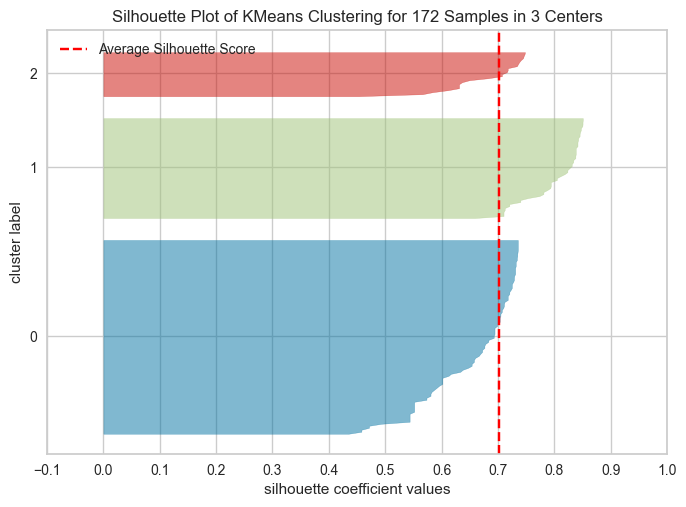

In [28]:
silhouetteVisualization()

In [29]:
# Testing K-Means without LOF
testWL = dataGenap.copy()
testWL = testWL.rename(columns={
    'IPGenap': 'IP',
    'OrganisasiGenap': 'Organisasi',
    'KerjaGenap': 'Kerja',
    })
testWL

,IP,Organisasi,Kerja
0,3.37,0,0
1,3.80,1,0
2,3.70,1,0
3,3.57,0,0
4,4.00,1,1
...,...,...,...
205,3.48,0,1
206,3.60,0,0
207,3.11,1,0
208,4.00,0,0


In [30]:
figElbowWL, optimumElbowValueWL, optimumElbowScoreWL= elbowMethod(testWL)
figElbowWL

In [31]:

figSilhouetteWL, optimumSilhouetteValueWL, optimumSilhouetteScoreWL= silhouetteMethod(testWL)
silhouetteWLOptimal = "Optimal Cluster = {}, with {} score".format(optimumSilhouetteValueWL, optimumSilhouetteScoreWL)
figSilhouetteWL

In [32]:
kmeansModelWL, kmeansLabelsWL, kmeansCentroidsWL = kmeansMethod(testWL, optimumSilhouetteValueWL)

In [33]:
testWL.insert(3,"Cluster", kmeansModelWL.labels_.astype(str))
testWL

,IP,Organisasi,Kerja,Cluster
0,3.37,0,0,0
1,3.80,1,0,1
2,3.70,1,0,1
3,3.57,0,0,5
4,4.00,1,1,3
...,...,...,...,...
205,3.48,0,1,2
206,3.60,0,0,5
207,3.11,1,0,1
208,4.00,0,0,5


In [34]:
warningWL = detectWarning(testWL["IP"].to_list())
testWL["Status"] = warningWL
testWL

,IP,Organisasi,Kerja,Cluster,Status
0,3.37,0,0,0,Safe
1,3.80,1,0,1,Safe
2,3.70,1,0,1,Safe
3,3.57,0,0,5,Safe
4,4.00,1,1,3,Safe
...,...,...,...,...,...
205,3.48,0,1,2,Safe
206,3.60,0,0,5,Safe
207,3.11,1,0,1,Safe
208,4.00,0,0,5,Safe


In [35]:
kmeansPlot = createPlot3D(testWL, "IP", "Organisasi", "Kerja", "Cluster",shape= "Status")
kmeansPlot

In [36]:
#UI Implementation
app = dash.Dash(external_stylesheets=[dbc.themes.BOOTSTRAP])

In [37]:
# CSS untuk sidebar.
SIDEBAR_STYLE = {
    "position": "fixed",
    "top": 0,
    "left": 0,
    "bottom": 0,
    "width": "16rem",
    "padding": "2rem 1rem",
    "background-color": "#221E40",
}

# CSS untuk main content yang terletak di sebelah kanan sidebar
CONTENT_STYLE = {
    "margin-left": "18rem",
    "margin-right": "2rem",
    "padding": "2rem 1rem",
}

PAGE_SIZE = 10

In [38]:
home = html.Div([
    html.H2('Raw Data', style = {'font-weight' : 'bold'}),
    html.Br(),
    dbc.Col([
            dbc.Card(
                [html.H6(id="hael"), html.H4("Data Asli")],
                className="p-4 mr-2 shadow-sm  ",
            ),
            html.Div(
                dash_table.DataTable(    
                    id='table-filtering',
                    columns=[
                        {"name": i, "id": i} for i in data.columns
                    ],
                    style_header={
                        'backgroundColor': 'rgb(50, 50, 50)',
                        'color': 'white'
                    },
                    style_cell={'padding': '5px'},
                        style_cell_conditional=[
                        {
                            'textAlign': 'center'
                        }
                    ],

                    page_current=0,
                    page_size=PAGE_SIZE,
                    page_action='custom',

                    filter_action='custom',
                    filter_query='' 
                )
            )
        ],
    ),
])

operators = [['ge ', '>='],
             ['le ', '<='],
             ['lt ', '<'],
             ['gt ', '>'],
             ['ne ', '!='],
             ['eq ', '='],
             ['contains '],
             ['datestartswith ']]


def split_filter_part(filter_part):
    for operator_type in operators:
        for operator in operator_type:
            if operator in filter_part:
                name_part, value_part = filter_part.split(operator, 1)
                name = name_part[name_part.find('{') + 1: name_part.rfind('}')]

                value_part = value_part.strip()
                v0 = value_part[0]
                if (v0 == value_part[-1] and v0 in ("'", '"', '`')):
                    value = value_part[1: -1].replace('\\' + v0, v0)
                else:
                    try:
                        value = float(value_part)
                    except ValueError:
                        value = value_part
                return name, operator_type[0].strip(), value

    return [None] * 3


@app.callback(
    Output('table-filtering', "data"),
    Input('table-filtering', "page_current"),
    Input('table-filtering', "page_size"),
    Input('table-filtering', "filter_query"))
def update_table(page_current,page_size, filter):
    print(filter)
    filtering_expressions = filter.split(' && ')
    print(filtering_expressions)
    dff = data
    for filter_part in filtering_expressions:
        col_name, operator, filter_value = split_filter_part(filter_part)
        print(operator)
        if operator in ('eq', 'ne', 'lt', 'le', 'gt', 'ge'):
            
            # these operators match pandas series operator method names
            dff = dff.loc[getattr(dff[col_name], operator)(filter_value)]
        elif operator == 'contains':
            if str(filter_value)[-2:] == ".0":
                filter_value = str(round(filter_value));
            else:
                filter_value = str(filter_value);
            dff = dff.loc[dff[col_name].astype(str).str.contains(filter_value)]
        elif operator == 'datestartswith':
            # this is a simplification of the front-end filtering logic,
            # only works with complete fields in standard format
            filter_value = str(filter_value);
            dff = dff.loc[dff[col_name].astype(str).str.startswith(filter_value)]

    return dff.iloc[
        page_current*page_size:(page_current+ 1)*page_size
    ].to_dict('rows')

In [39]:
page1 = html.Div([
    html.H2('Data Cleansing', style = {'font-weight' : 'bold'}),
    html.Br(),
    dbc.Col([
            dbc.Card(
                [html.H6(id="hael"), html.H4("Remove Unused and Null Data")],
                className="p-4 mr-2 shadow-sm  ",
            ),
            html.Div(
                dash_table.DataTable(    
                    id='table2-filtering',
                    columns=[
                        {"name": i, "id": i} for i in dataFilter.columns
                    ],
                    style_header={
                        'backgroundColor': 'rgb(50, 50, 50)',
                        'color': 'white'
                    },
                    style_cell={'padding': '5px'},
                        style_cell_conditional=[
                        {
                            'textAlign': 'center'
                        }
                    ],
                    page_current=0,
                    page_size=PAGE_SIZE,
                    page_action='custom',

                    filter_action='custom',
                    filter_query='' 
                )
            ),
        ],
    ),
    html.Br(),
    dbc.Col([
            dbc.Card(
                [html.H6(id="hael"), html.H4("Encoding Data")],
                className="p-4 mr-2 shadow-sm  ",
            ),
            html.Div(
                dash_table.DataTable(    
                    id='table2-encoding',
                    columns=[
                        {"name": i, "id": i} for i in dataGenap.columns
                    ],
                    style_header={
                        'backgroundColor': 'rgb(50, 50, 50)',
                        'color': 'white'
                    },
                    style_cell={'padding': '5px'},
                        style_cell_conditional=[
                        {
                            'textAlign': 'center'
                        }
                    ],
                    page_current=0,
                    page_size=PAGE_SIZE,
                    page_action='custom',

                    filter_action='custom',
                    filter_query='' 
                )
            ),
        ],
    ),
])

@app.callback(
    Output('table2-filtering', "data"),
    Input('table2-filtering', "page_current"),
    Input('table2-filtering', "page_size"),
    Input('table2-filtering', "filter_query"))
def update_table(page_current,page_size, filter):
    print(filter)
    filtering_expressions = filter.split(' && ')
    dff = dataFilter
    for filter_part in filtering_expressions:
        col_name, operator, filter_value = split_filter_part(filter_part)
        if operator in ('eq', 'ne', 'lt', 'le', 'gt', 'ge'):
            # these operators match pandas series operator method names
            dff = dff.loc[getattr(dff[col_name], operator)(filter_value)]
        elif operator == 'contains':
            if str(filter_value)[-2:] == ".0":
                filter_value = str(round(filter_value));
            else:
                filter_value = str(filter_value);
            dff = dff.loc[dff[col_name].astype(str).str.contains(filter_value)]
        elif operator == 'datestartswith':
            # this is a simplification of the front-end filtering logic,
            # only works with complete fields in standard format
            filter_value = str(filter_value);
            dff = dff.loc[dff[col_name].astype(str).str.startswith(filter_value)]

    return dff.iloc[
        page_current*page_size:(page_current+ 1)*page_size
    ].to_dict('rows')


@app.callback(
    Output('table2-encoding', "data"),
    Input('table2-encoding', "page_current"),
    Input('table2-encoding', "page_size"),
    Input('table2-encoding', "filter_query"))
def update_table(page_current,page_size, filter):
    print(filter)
    filtering_expressions = filter.split(' && ')
    dff = dataGenap
    for filter_part in filtering_expressions:
        col_name, operator, filter_value = split_filter_part(filter_part)
        if operator in ('eq', 'ne', 'lt', 'le', 'gt', 'ge'):
            # these operators match pandas series operator method names
            dff = dff.loc[getattr(dff[col_name], operator)(filter_value)]
        elif operator == 'contains':
            if str(filter_value)[-2:] == ".0":
                filter_value = str(round(filter_value));
            else:
                filter_value = str(filter_value);
            dff = dff.loc[dff[col_name].astype(str).str.contains(filter_value)]
        elif operator == 'datestartswith':
            # this is a simplification of the front-end filtering logic,
            # only works with complete fields in standard format
            filter_value = str(filter_value);
            dff = dff.loc[dff[col_name].astype(str).str.startswith(filter_value)]

    return dff.iloc[
        page_current*page_size:(page_current+ 1)*page_size
    ].to_dict('rows')

In [40]:
page2 = html.Div([
    html.H2('Data Preparation', style = {'font-weight' : 'bold'}),
    html.Br(),
    dbc.Col([
            dbc.Card(
                [html.H6(id="hael"), html.H4("Outlier Detection")],
                className="p-4 mr-2 shadow-sm  ",
            ),
            html.Div(
                dash_table.DataTable(    
                    id='table2-outlier',
                    columns=[
                        {"name": i, "id": i} for i in fixOutlier.columns
                    ],
                    style_header={
                        'backgroundColor': 'rgb(50, 50, 50)',
                        'color': 'white'
                    },
                    style_cell={'padding': '5px'},
                        style_cell_conditional=[
                        {
                            'textAlign': 'center'
                        }
                    ],
                    page_current=0,
                    page_size=PAGE_SIZE,
                    page_action='custom',

                    filter_action='custom',
                    filter_query='' 
                )
            ),
            html.Br(),
            dcc.Graph(figure=outlierPlot),
        ],
    ),
])

@app.callback(
    Output('table2-outlier', "data"),
    Input('table2-outlier', "page_current"),
    Input('table2-outlier', "page_size"),
    Input('table2-outlier', "filter_query"))
def update_table(page_current,page_size, filter):
    print(filter)
    filtering_expressions = filter.split(' && ')
    dff = fixOutlier
    for filter_part in filtering_expressions:
        col_name, operator, filter_value = split_filter_part(filter_part)
        if operator in ('eq', 'ne', 'lt', 'le', 'gt', 'ge'):
            # these operators match pandas series operator method names
            dff = dff.loc[getattr(dff[col_name], operator)(filter_value)]
        elif operator == 'contains':
            if str(filter_value)[-2:] == ".0":
                filter_value = str(round(filter_value));
            else:
                filter_value = str(filter_value);
            dff = dff.loc[dff[col_name].astype(str).str.contains(filter_value)]
        elif operator == 'datestartswith':
            # this is a simplification of the front-end filtering logic,
            # only works with complete fields in standard format
            filter_value = str(filter_value);
            dff = dff.loc[dff[col_name].astype(str).str.startswith(filter_value)]

    return dff.iloc[
        page_current*page_size:(page_current+ 1)*page_size
    ].to_dict('rows')

In [41]:
page3 = html.Div([
    html.H2('Data Modelling', style = {'font-weight' : 'bold'}),
    html.Br(),
    dbc.Row([
            dbc.Col([
                    dbc.Card(
                        [html.H6(id="hael"), html.H4("Elbow Method")],
                        className="p-4 mr-2 shadow-sm  ",
                    ),
                    dcc.Graph(figure=figElbow),
                ],
            ),
            dbc.Col([
                    dbc.Card(
                        [html.H6(id="hael"), html.H4("Silhouette Coefficient")],
                        className="p-4 mr-2 shadow-sm  ",
                    ),
                    dcc.Graph(figure=figSilhouette),
                    html.H6(silhouetteOptimal, style= {'text-align': 'center'}),
                ],
            ),
        ],
        className="m-2 mb-4",
    ),
    html.Br(),
    dbc.Col([
            dbc.Card(
                [html.H6(id="sr"), html.H4("Clustering Result")],
                className="p-4 mr-2 shadow-sm  ",

            ),
            html.Div(
                dash_table.DataTable(    
                    id='table-cluster',
                    columns=[
                        {"name": i, "id": i} for i in fixData.columns
                    ],
                    style_header={
                        'backgroundColor': 'rgb(50, 50, 50)',
                        'color': 'white'
                    },
                    style_cell={'padding': '5px'},
                        style_cell_conditional=[
                        {
                            'textAlign': 'center'
                        }
                    ],

                    page_current=0,
                    page_size=PAGE_SIZE,
                    page_action='custom',

                    filter_action='custom',
                    filter_query='' 
                )
            ),
        ],
    ),
])

@app.callback(
    Output('table-cluster', "data"),
    Input('table-cluster', "page_current"),
    Input('table-cluster', "page_size"),
    Input('table-cluster', "filter_query"))
def update_table(page_current,page_size, filter):
    print(filter)
    filtering_expressions = filter.split(' && ')
    dff = fixData
    for filter_part in filtering_expressions:
        col_name, operator, filter_value = split_filter_part(filter_part)
        if operator in ('eq', 'ne', 'lt', 'le', 'gt', 'ge'):
            # these operators match pandas series operator method names
            dff = dff.loc[getattr(dff[col_name], operator)(filter_value)]
        elif operator == 'contains':
            if str(filter_value)[-2:] == ".0":
                filter_value = str(round(filter_value));
            else:
                filter_value = str(filter_value);
            dff = dff.loc[dff[col_name].astype(str).str.contains(filter_value)]
        elif operator == 'datestartswith':
            # this is a simplification of the front-end filtering logic,
            # only works with complete fields in standard format
            filter_value = str(filter_value);
            dff = dff.loc[dff[col_name].astype(str).str.startswith(filter_value)]

    return dff.iloc[
        page_current*page_size:(page_current+ 1)*page_size
    ].to_dict('rows')

In [42]:
page4 = html.Div([
    html.H2('Clustering Comparation', style = {'font-weight' : 'bold'}),
    html.Br(),
    dbc.Card(
        [html.H6(id="hael"), html.H4("K-Means")],
        className="p-4 mr-2 shadow-sm  ",
    ),
    html.Br(),
    dbc.Col([
            dbc.Row([
                dbc.Col([
                        dbc.Card(
                            [html.H6(id="hael"), html.H4("Elbow Method")],
                            className="p-4 mr-2 shadow-sm  ",
                        ),
                        dcc.Graph(figure=figElbowWL),
                    ],
                ),
                dbc.Col([
                        dbc.Card(
                            [html.H6(id="hael"), html.H4("Silhouette Coefficient")],
                            className="p-4 mr-2 shadow-sm  ",
                        ),
                        dcc.Graph(figure=figSilhouetteWL),
                        html.H6(silhouetteWLOptimal, style= {'text-align': 'center'}),
                    ],
                ),
            ],
            className="m-2 mb-4",
        ),
        dcc.Graph(figure=kmeansPlot)
    ]),
    html.Br(),
    dbc.Card(
        [html.H6(id="hael"), html.H4("K-Means + Local Outlier Factor")],
        className="p-4 mr-2 shadow-sm  ",
    ),
    html.Br(),
    dbc.Col([
            dbc.Row([
                    dbc.Col([
                            dbc.Card(
                                [html.H6(id="hael"), html.H4("Elbow Method")],
                                className="p-4 mr-2 shadow-sm  ",
                            ),
                            dcc.Graph(figure=figElbow),
                        ],
                    ),
                    dbc.Col([
                            dbc.Card(
                                [html.H6(id="hael"), html.H4("Silhouette Coefficient")],
                                className="p-4 mr-2 shadow-sm  ",
                            ),
                            dcc.Graph(figure=figSilhouette),
                            html.H6(silhouetteOptimal, style= {'text-align': 'center'}),
                        ],
                    ),
                ],
                className="m-2 mb-4",
            ),
        dcc.Graph(figure=kmeansLofPlot)
    ]),
])

In [43]:
image_filename = 'silVis.png'
encoded_image = base64.b64encode(open(image_filename, 'rb').read())

page5 = html.Div([
    html.H2('Clustering Analysis', style = {'font-weight' : 'bold'}),
    html.Br(),
    dbc.Row([
        dbc.Card(
            [html.H6(id="judul_final"), html.H4("Final Analysis")],
            className="p-4 mr-2 shadow-sm",
        )],
            className="m-2 mb-4",
        ),
    dbc.Row([
        dbc.Card(
            [html.H6(id="3"), html.H6("Cluster 0"), html.P("Mahasiswa yang termasuk dalam Cluster 0 merupakan mahasiswa yang hanya berfokus pada kegiatan akademik tanpa mengikuti organisasi maupun pekerjaan")],
            className="p-4 mr-2 shadow-sm",
        )],
        className="m-2 mb-4",
    ),
    dbc.Row([
        dbc.Card(
            [html.H6(id="1"), html.H6("Cluster 1"), html.Br(), html.P("Mahasiswa yang termasuk dalam Cluster 1 merupakan mahasiswa yang mengikuti kegiatan organisasi disamping kegiatan akademik")],
            
            className="p-4 mr-2 shadow-sm",
        )],
        className="m-2 mb-4",
    ),
    dbc.Row([
        dbc.Card(
            [html.H6(id="0"), html.H6("Cluster 2 : (Cluster Warning)"), html.Br(), html.P("Mahasiswa yang termasuk dalam Cluster 2 merupakan mahasiswa yang tidak hanya mengikuti organisasi, namun juga bekerja disamping kegiatan akademik")],
            className="p-4 mr-2 shadow-sm",
        )],
        className="m-2 mb-4",
    ),
    html.Br(),
    dbc.Col([
            dbc.Card(
                [html.H6(id="hael"), html.H4("Model Evaluation")],
                className="p-4 mr-2 shadow-sm  ",
            ),
            html.Div([
                html.Img(src='data:image/png;base64,{}'.format(encoded_image.decode()))
            ], style={'textAlign': 'center'}),
            html.H6(silhouetteOptimal, style= {'text-align': 'center'}),
        ],
    ),
])

In [44]:
sidebar = html.Div(
    [
        html.H3("Klasterisasi Performa Akademik Mahasiswa", style={'color': 'white', 'font-family':'sans-serif', 'size':12}),
        html.Hr(),
        dbc.Nav(
            [
                dbc.NavLink("Raw Data", href="/", active="exact", style={'color': 'white'}),
                dbc.NavLink("Data Cleansing", href="/page-1", active="exact", style={'color': 'white'}),
                dbc.NavLink("Data Preparation", href="/page-2", active="exact", style={'color': 'white'}),
                dbc.NavLink("Modelling", href="/page-3", active="exact", style={'color': 'white'}),
                dbc.NavLink("Clustering Comparation", href="/page-4", active="exact", style={'color': 'white'}),
                dbc.NavLink("Cluster Analysis", href="/page-5", active="exact", style={'color': 'white'}),
            ],
            vertical=True,
            pills=True,
            style={'marginTop': "3rem"}
        ),
    ],
    style=SIDEBAR_STYLE,
)

content = html.Div(id="page-content", style=CONTENT_STYLE)

app.layout = html.Div([dcc.Location(id="url"), sidebar, content])


@app.callback(Output("page-content", "children"), [Input("url", "pathname")])
def render_page_content(pathname):
    if pathname == "/":
        return home
    elif pathname == "/page-1":
        return page1
    elif pathname == "/page-2":
        return page2
    elif pathname == "/page-3":
        return page3
    elif pathname == "/page-4":
        return page4
    elif pathname == "/page-5":
        return page5
    else:
        return dbc.Row([
            dbc.Card([
                    html.H1("404: Not found", className="text-danger"),
                    html.Hr(),
                    html.P(f"The pathname {pathname} was not recognised..."),
                ],
                className="p-4 mr-2 shadow-sm",
            )],
            className="m-2 mb-4",
        )
    # If the user tries to reach a different page, return a 404 message

In [45]:
if __name__ == "__main__":
    app.run_server(port=4050)

Dash is running on http://127.0.0.1:4050/

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:4050
Press CTRL+C to quit
127.0.0.1 - - [31/Jan/2023 14:45:01] "GET /page-4 HTTP/1.1" 200 -
127.0.0.1 - - [31/Jan/2023 14:45:01] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [31/Jan/2023 14:45:01] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [31/Jan/2023 14:45:01] "GET /_favicon.ico?v=2.7.0 HTTP/1.1" 200 -
127.0.0.1 - - [31/Jan/2023 14:45:01] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [31/Jan/2023 14:45:01] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 304 -
127.0.0.1 - - [31/Jan/2023 14:45:01] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 304 -
